In [6]:
import os

input_dir = "/home/sarim.hashmi/Downloads/unet_from_scratch/dataset/images/images"
target_dir = "/home/sarim.hashmi/Downloads/unet_from_scratch/dataset/annotations/trimaps"

input_img_paths =sorted([os.path.join(input_dir , fname )for fname in os.listdir(input_dir) if fname.endswith(".jpg")])
target_img_paths = sorted([os.path.join(target_dir , fname) for fname in os.listdir(target_dir) if fname.endswith(".png") and not fname.startswith(".")])

In [7]:
print(len(input_img_paths))

print(len(target_img_paths))

7389
7389


In [8]:
input_filenames = set(os.path.splitext(fname)[0] for fname in os.listdir(input_dir) if fname.endswith(".jpg"))

# Get target annotation filenames without extension
target_filenames = set(os.path.splitext(fname)[0] for fname in os.listdir(target_dir) if fname.endswith(".png") and not fname.startswith("."))

# Find the extra annotation
extra_annotations = target_filenames - input_filenames

if extra_annotations:
    print("Extra annotation file(s):")
    for extra in extra_annotations:
        print(f"{extra}.png")
else:
    print("No extra annotation files found.")

# Additional check for missing annotations
missing_annotations = input_filenames - target_filenames
if missing_annotations:
    print("\nMissing annotation file(s):")
    for missing in missing_annotations:
        print(f"{missing}.png")

No extra annotation files found.


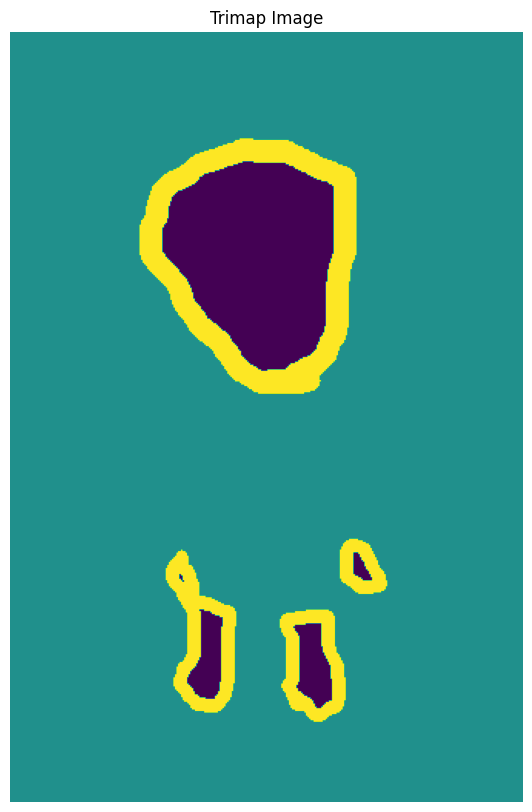

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def display_target(img):
    normalized_img = (img.astype("uint8") - 1) * 127 
    plt.axis("off")
    plt.imshow(normalized_img[: , : , 0])

# Load and display a trimap
target_dir = "/home/sarim.hashmi/Downloads/unet_from_scratch/dataset/annotations/trimaps"

# Get the first trimap file (you can change this to display a specific file)
trimap_files = [f for f in os.listdir(target_dir) if f.endswith(".png") and not f.startswith(".")]
if trimap_files:
    sample_trimap_path = os.path.join(target_dir, trimap_files[0])
    
    # Load the trimap
    trimap = np.array(Image.open(sample_trimap_path))
    
    # Ensure the trimap is 3D (add a channel dimension if it's 2D)
    if len(trimap.shape) == 2:
        trimap = trimap[:, :, np.newaxis]
    
    # Ensure values are 1, 2, 3 (if they're 0, 1, 2, add 1)
    if trimap.min() == 0:
        trimap = trimap + 1
    
    # Display the trimap
    plt.figure(figsize=(10, 10))
    display_target(trimap)
    plt.title('Trimap Image')
    plt.show()
else:
    print("No trimap files found in the directory.")

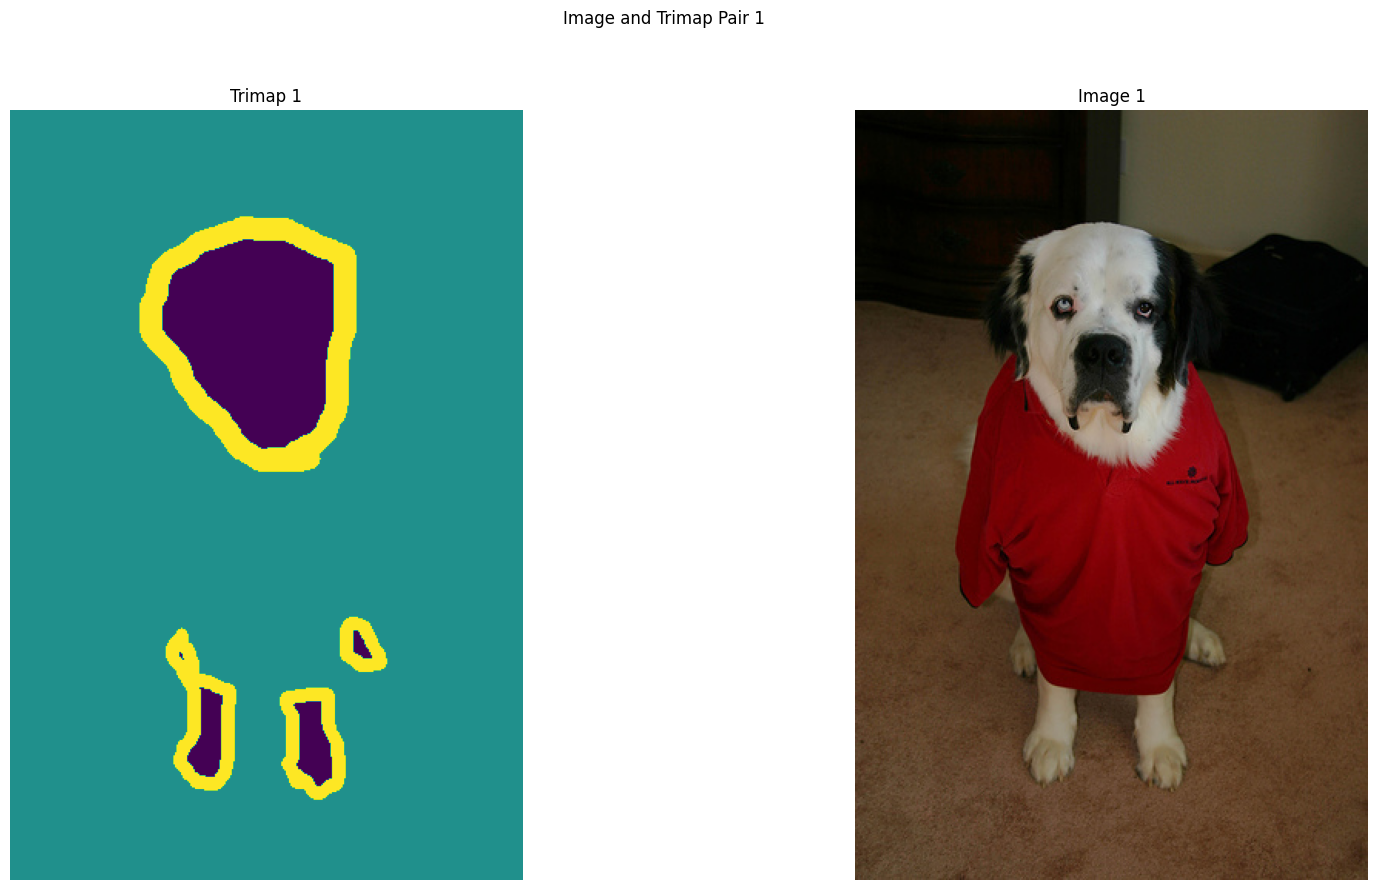

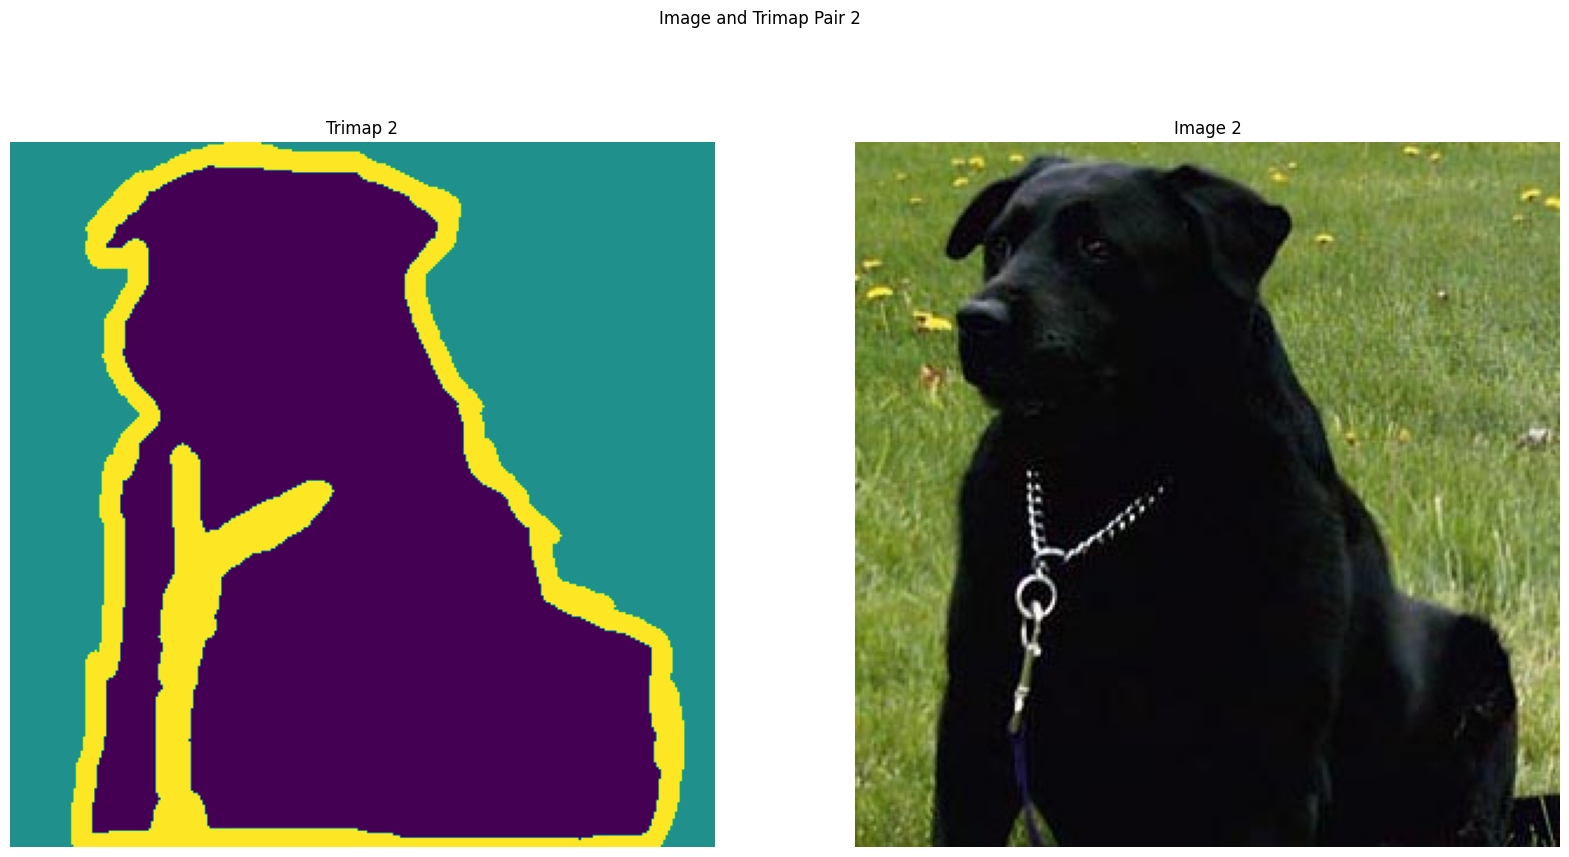

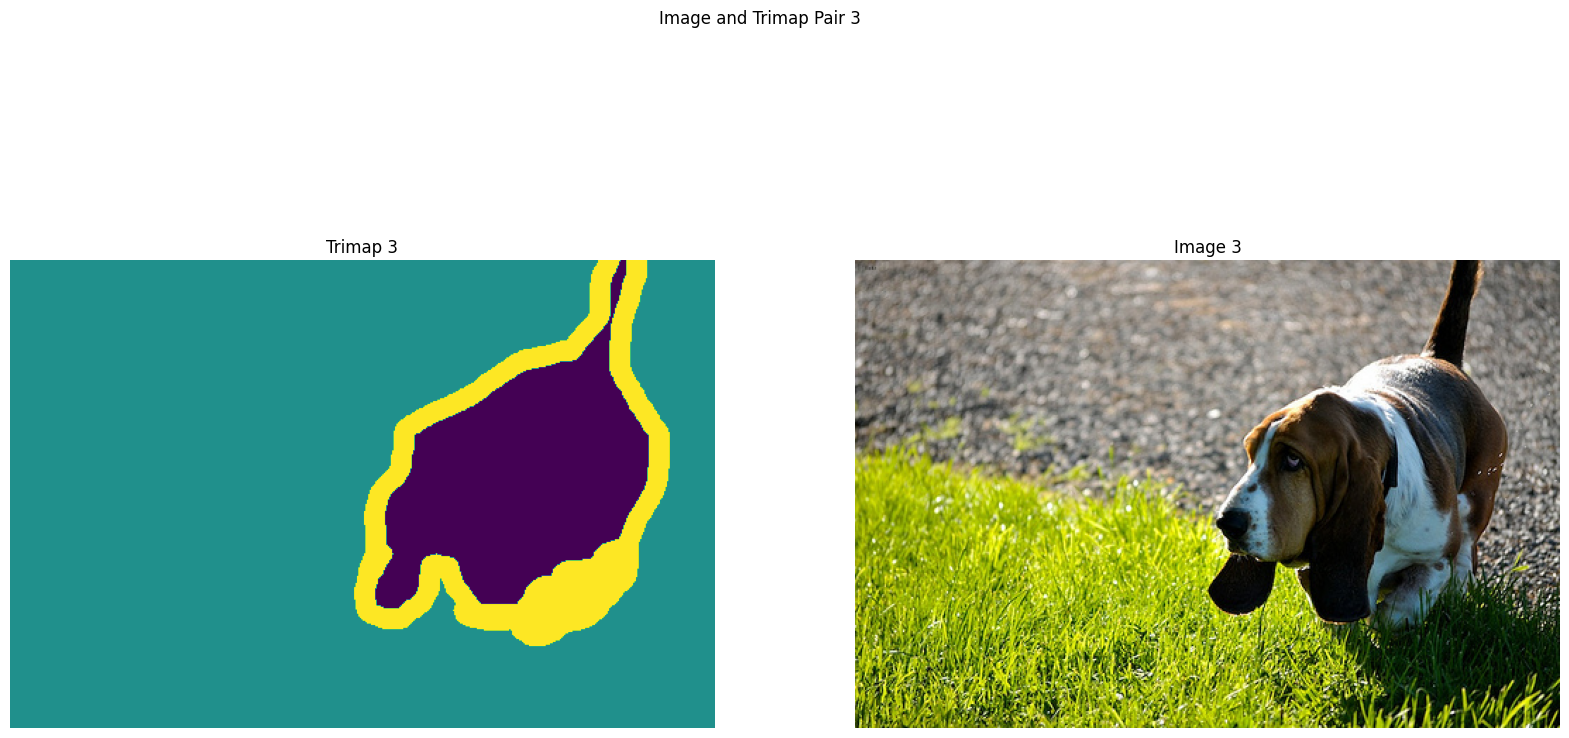

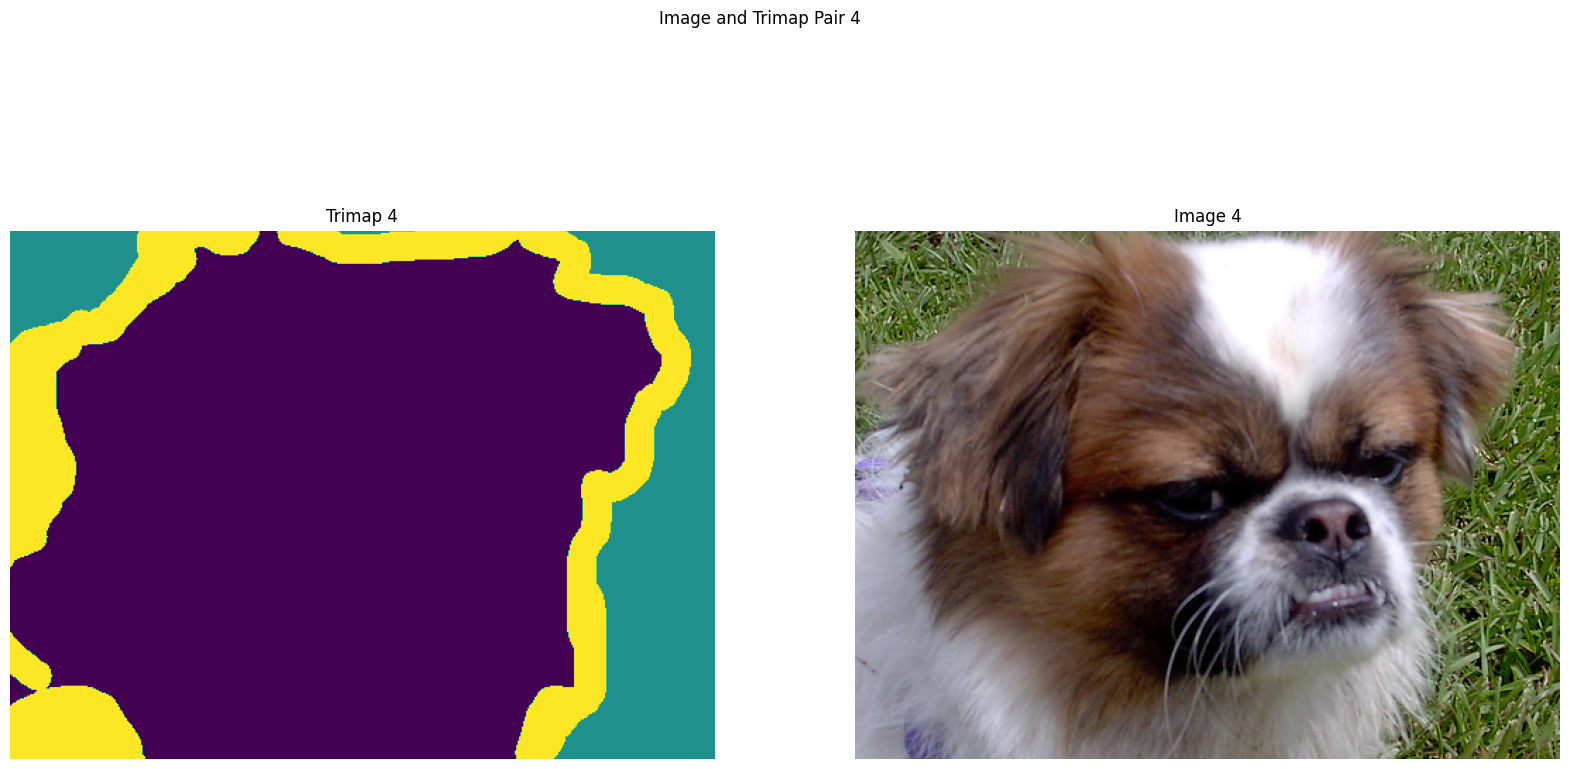

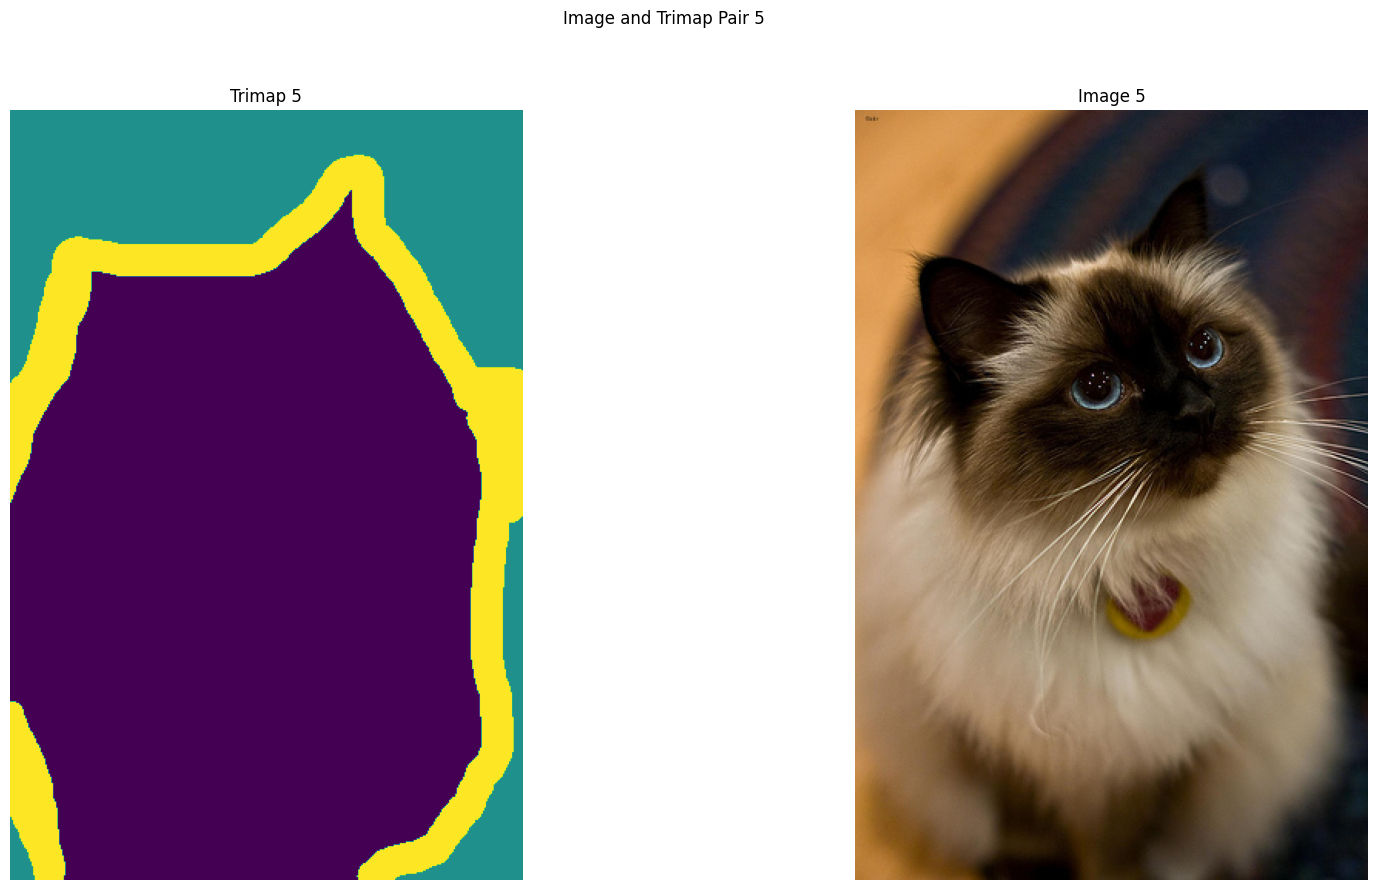

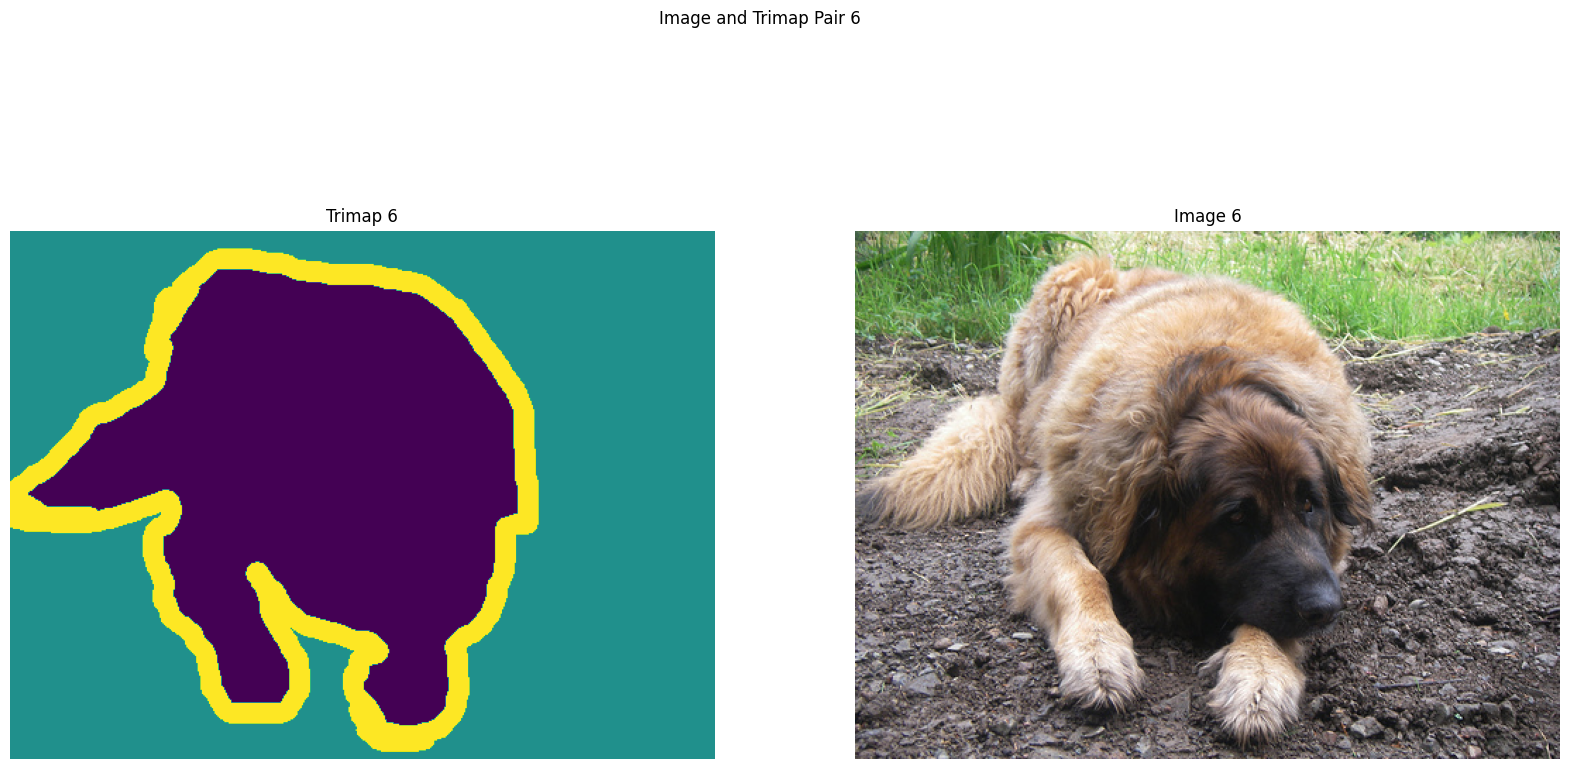

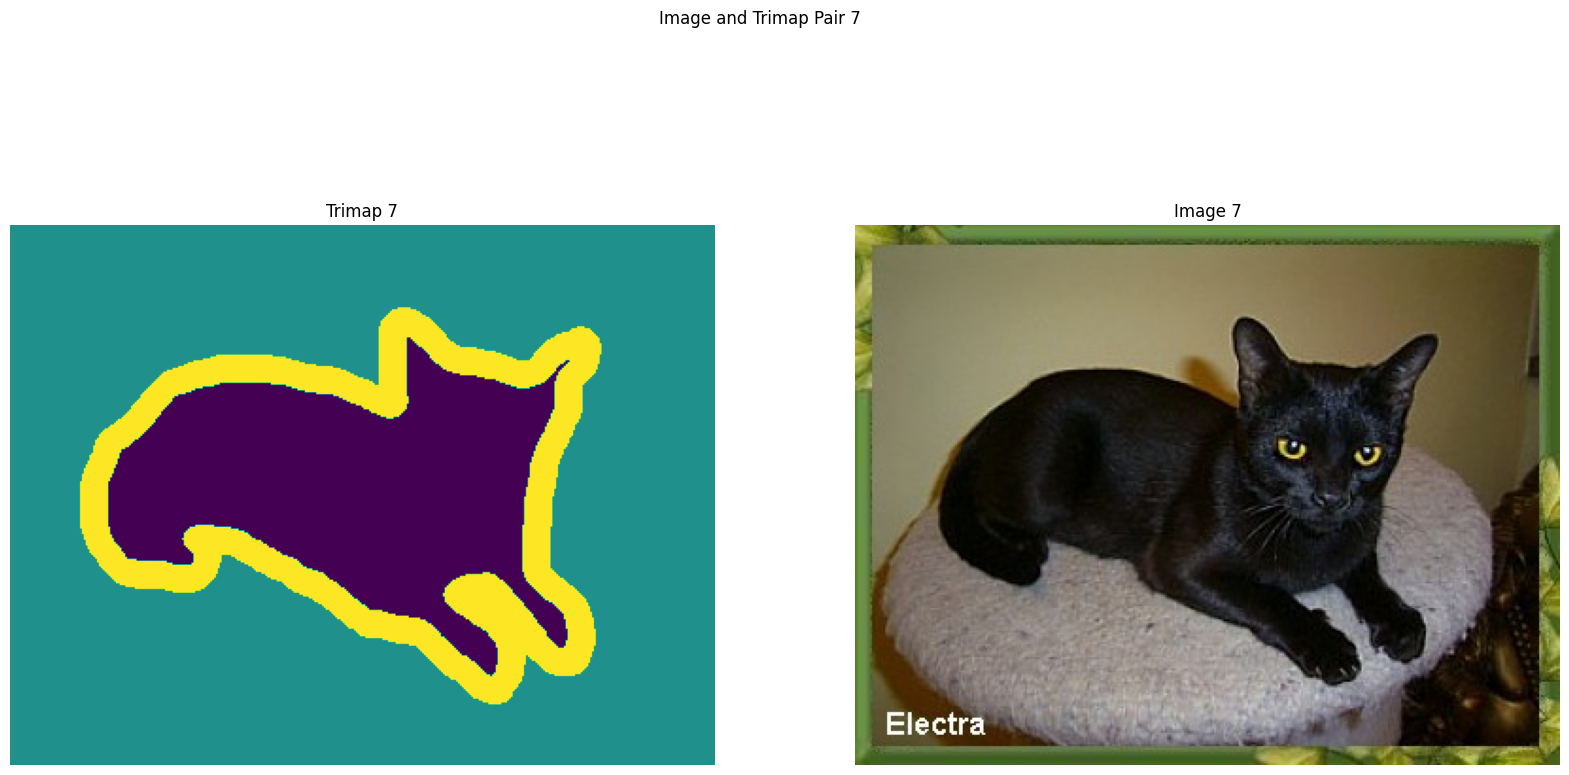

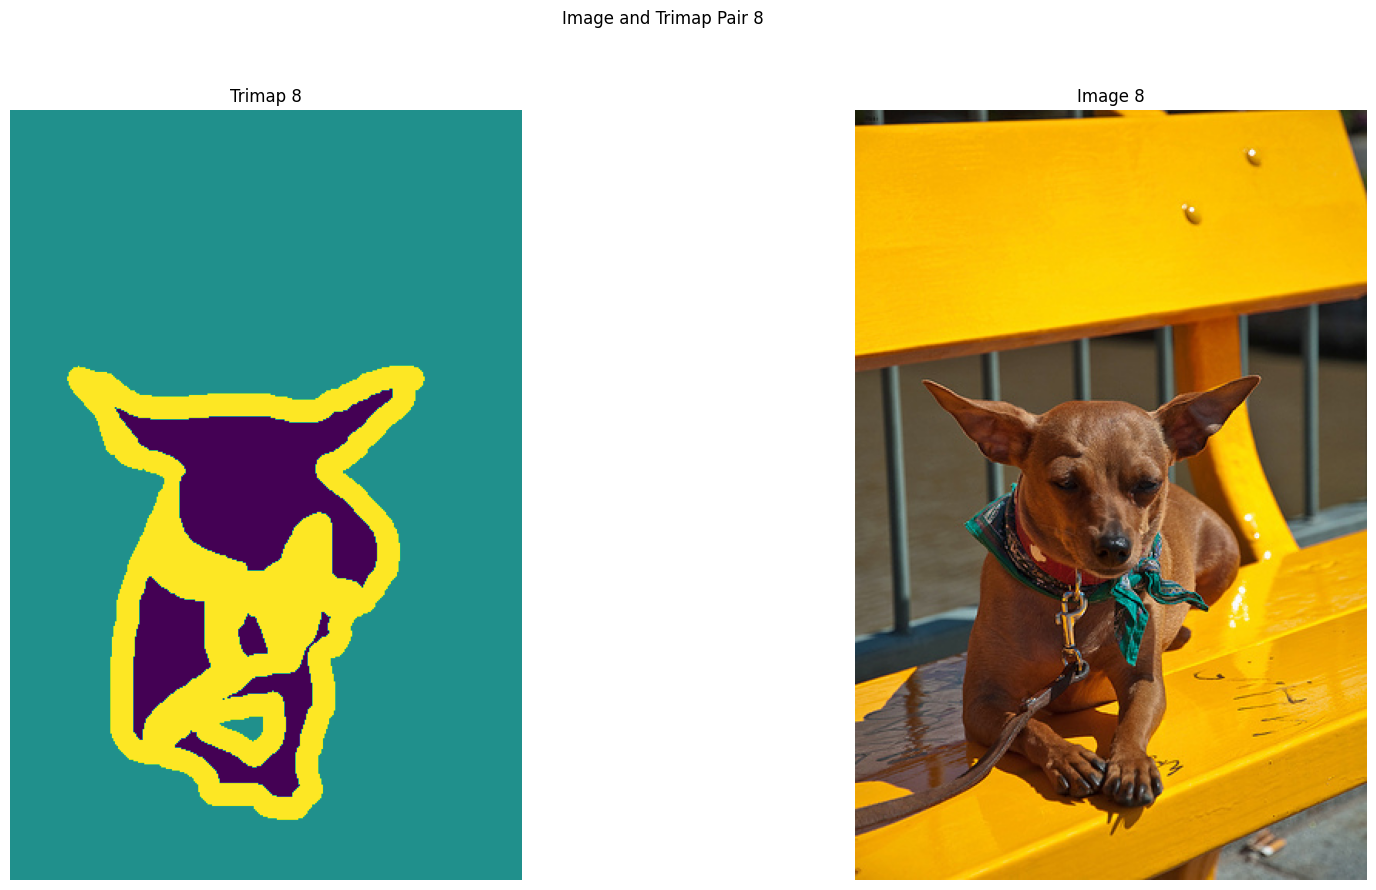

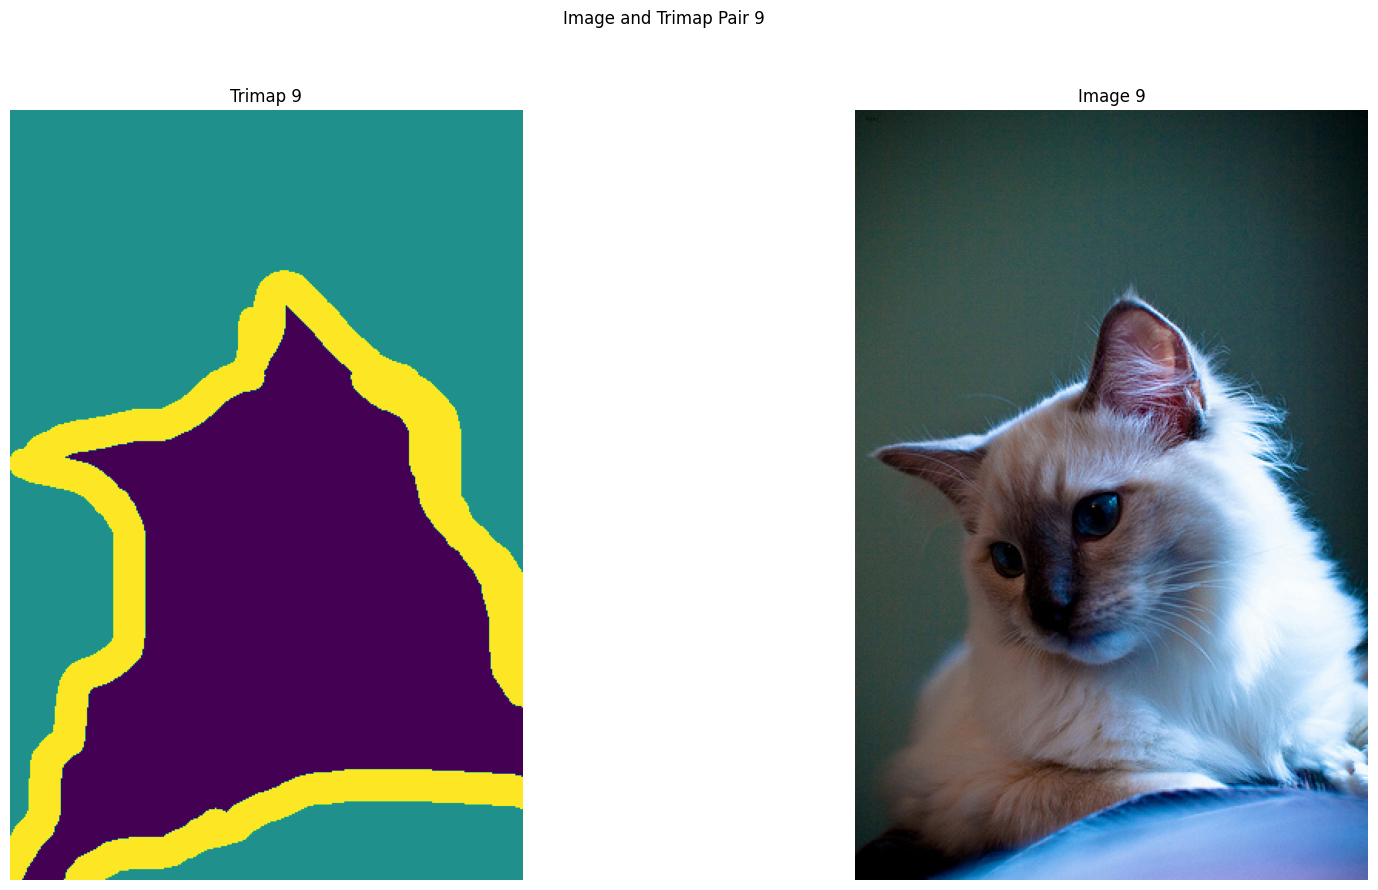

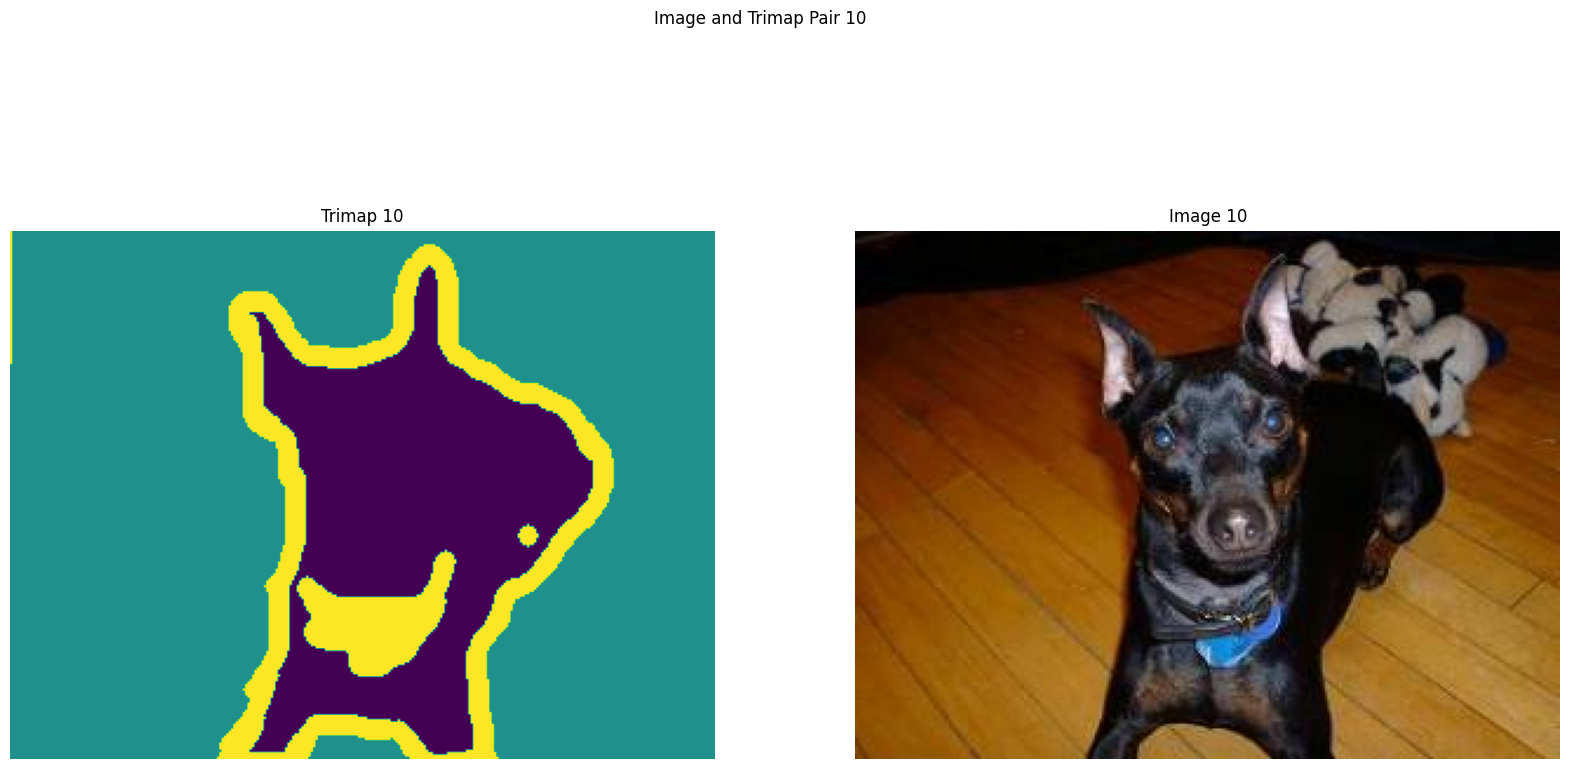

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

def display_target(img):
    normalized_img = (img.astype("uint8") - 1) * 127 
    plt.axis("off")
    plt.imshow(normalized_img[:, :, 0])

# Directories
trimap_dir = "/home/sarim.hashmi/Downloads/unet_from_scratch/dataset/annotations/trimaps"
image_dir = "/home/sarim.hashmi/Downloads/unet_from_scratch/dataset/images"

# Get trimap files
trimap_files = [f for f in os.listdir(trimap_dir) if f.endswith(".png") and not f.startswith(".")]

# Display first 10 images and their trimaps
for i, trimap_file in enumerate(trimap_files[:10]):
    # Load trimap
    trimap_path = os.path.join(trimap_dir, trimap_file)
    trimap = np.array(Image.open(trimap_path))
    
    # Ensure the trimap is 3D (add a channel dimension if it's 2D)
    if len(trimap.shape) == 2:
        trimap = trimap[:, :, np.newaxis]
    
    # Ensure values are 1, 2, 3 (if they're 0, 1, 2, add 1)
    if trimap.min() == 0:
        trimap = trimap + 1
    
    # Load corresponding image
    image_file = trimap_file.replace('.png', '.jpg')  # Assuming images are jpg
    image_path = os.path.join(image_dir, image_file)
    
    if os.path.exists(image_path):
        image = np.array(Image.open(image_path))
    else:
        print(f"Image not found: {image_file}")
        continue
    
    # Display trimap and image side by side
    plt.figure(figsize=(20, 10))
    
    plt.subplot(1, 2, 1)
    display_target(trimap)
    plt.title(f'Trimap {i+1}')
    
    plt.subplot(1, 2, 2)
    plt.imshow(image)
    plt.axis("off")
    plt.title(f'Image {i+1}')
    
    plt.suptitle(f'Image and Trimap Pair {i+1}')
    plt.show()


In [4]:
import numpy as np
from PIL import Image
import os
from tqdm import tqdm

# Directories
trimap_dir = "/home/sarim.hashmi/Downloads/unet_from_scratch/dataset/annotations/trimaps"
binary_mask_dir = "/home/sarim.hashmi/Downloads/unet_from_scratch/dataset/binary_masks"

# Create binary mask directory if it doesn't exist
os.makedirs(binary_mask_dir, exist_ok=True)

def trimap_to_binary(trimap):
    # Convert trimap to binary mask
    # Assuming:
    # - Background is 1
    # - Foreground is 3
    # - Unknown/Border is 2
    binary = np.zeros_like(trimap)
    binary[trimap == 1] = 1  # Set foreground to 1
    return binary

# Get trimap files with tqdm
trimap_files = []
for file in tqdm(os.listdir(trimap_dir), desc="Listing files"):
    if file.endswith(".png") and not file.startswith("."):
        trimap_files.append(file)

# Process each trimap
for trimap_file in tqdm(trimap_files, desc="Converting trimaps"):
    # Load trimap
    trimap_path = os.path.join(trimap_dir, trimap_file)
    trimap = np.array(Image.open(trimap_path))
    
    # Convert to binary
    binary_mask = trimap_to_binary(trimap)
    
    # Save binary mask
    binary_mask_path = os.path.join(binary_mask_dir, trimap_file)
    Image.fromarray((binary_mask * 255).astype(np.uint8)).save(binary_mask_path)

print(f"Converted {len(trimap_files)} trimaps to binary masks.")
print(f"Binary masks saved in: {binary_mask_dir}")

Converting trimaps: 100%|██████████| 7389/7389 [00:18<00:00, 405.96it/s]

Converted 7389 trimaps to binary masks.
Binary masks saved in: /home/sarim.hashmi/Downloads/unet_from_scratch/dataset/binary_masks


In [3]:
import nibabel as nib
import os

def print_nifti_shape(file_path):
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return

    try:
        # Load the NIfTI file
        nifti_img = nib.load(file_path)
        
        # Get the shape of the image data
        shape = nifti_img.shape
        
        print(f"File: {os.path.basename(file_path)}")
        print(f"Shape: {shape}")
        
        # If you want more details, you can also print:
        print(f"Dimensions: {len(shape)}")
        print(f"Data type: {nifti_img.get_data_dtype()}")
        
    except Exception as e:
        print(f"Error reading {file_path}: {str(e)}")

# Example usage
file_path = "/home/sarim.hashmi/Downloads/unet_from_scratch/predicted.nii.gz"
print_nifti_shape(file_path)

# If you want to process all .nii.gz files in a directory:
# directory = "/path/to/your/nifti/directory"
# for filename in os.listdir(directory):
#     if filename.endswith(".nii.gz"):
#         file_path = os.path.join(directory, filename)
#         print_nifti_shape(file_path)
#         print()  # Empty line for better readability between files

File: predicted.nii.gz
Shape: (240, 240, 155)
Dimensions: 3
Data type: float32


In [1]:
import numpy as np
import nibabel as nib
from scipy import sparse

def dice_coefficient(y_true, y_pred):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = np.sum(y_true_f * y_pred_f)
    return (2. * intersection) / (np.sum(y_true_f) + np.sum(y_pred_f))

def multi_class_dice_score(y_true, y_pred, num_classes):
    dice_scores = []
    for class_id in range(1, num_classes):  # Assuming 0 is background
        y_true_class = (y_true == class_id).astype(int)
        y_pred_class = (y_pred == class_id).astype(int)
        dice = dice_coefficient(y_true_class, y_pred_class)
        dice_scores.append(dice)
    return dice_scores

def calculate_dice_score(file1_path, file2_path):
    # Load the NIfTI files
    img1 = nib.load(file1_path)
    img2 = nib.load(file2_path)

    # Get the data arrays
    data1 = img1.get_fdata()
    data2 = img2.get_fdata()

    # Ensure the shapes are the same
    assert data1.shape == data2.shape == (240, 240, 155), "Shapes do not match or are not (240, 240, 155)"

    # Calculate multi-class Dice scores
    num_classes = int(max(np.max(data1), np.max(data2))) + 1
    print(f"Number of classes detected: {num_classes}")
    print(f"Unique values in data1: {np.unique(data1)}")
    print(f"Unique values in data2: {np.unique(data2)}")

    dice_scores = multi_class_dice_score(data1, data2, num_classes)

    # Calculate mean Dice score
    mean_dice = np.mean(dice_scores)

    return dice_scores, mean_dice

# Example usage
file1_path = "/home/sarim.hashmi/Downloads/unet_from_scratch/best_best.nii.gz"
file2_path = "/home/sarim.hashmi/Downloads/unet_from_scratch/BraTS-SSA-00125-000.nii.gz"

try:
    class_dice_scores, mean_dice = calculate_dice_score(file1_path, file2_path)

    print("Dice Scores for each class:")
    for i, score in enumerate(class_dice_scores, 1):
        print(f"Class {i}: {score:.4f}")
    print(f"Mean Dice Score: {mean_dice:.4f}")
except Exception as e:
    print(f"An error occurred: {str(e)}")

Number of classes detected: 4
Unique values in data1: [0. 1. 2. 3.]
Unique values in data2: [0. 1. 2. 3.]
Dice Scores for each class:
Class 1: 1.0000
Class 2: 1.0000
Class 3: 1.0000
Mean Dice Score: 1.0000
